In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [113]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [114]:
df = pd.read_csv("../Python/Output/SinDiff.txt", sep='\t')
df.head()

,Order,Freq,X,Index Sin,Value Error,Uncertainty
0,4,0,0.000000,0.000000,0.0,0.000000e+00
1,4,1,0.196350,0.195090,0.0,2.266233e-17
2,4,2,0.392699,0.382683,0.0,4.532467e-17
3,4,3,0.589049,0.555570,0.0,9.064933e-17
4,4,4,0.785398,0.707107,0.0,9.064933e-17


In [115]:
df['Normalized Error'] = df['Value Error'] / df['Uncertainty']
df['Absolute Error'] = np.abs(df['Value Error'])

# LibSin Errors Increase with FFT Order

<AxesSubplot:title={'center':'Library sin(x) - Indexed sin(x), order=4'}, xlabel='X'>

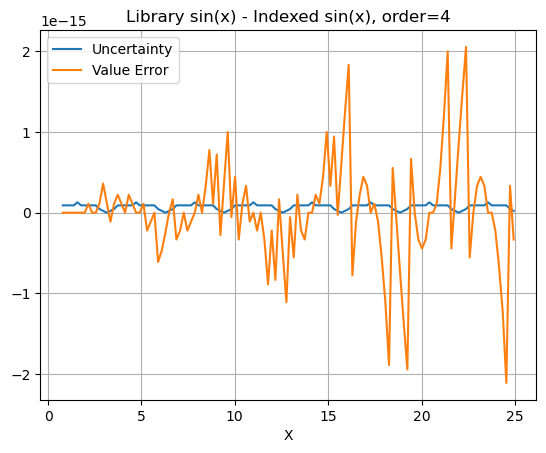

In [116]:
df[(df['Order']==4) & (df['X'] >= math.pi/4)].set_index('X')[['Uncertainty', 'Value Error']]\
    .plot(title='Library sin(x) - Indexed sin(x), order=4', grid=True)

<AxesSubplot:title={'center':'Library sin(x) - Indexed sin(x), order=5'}, xlabel='X'>

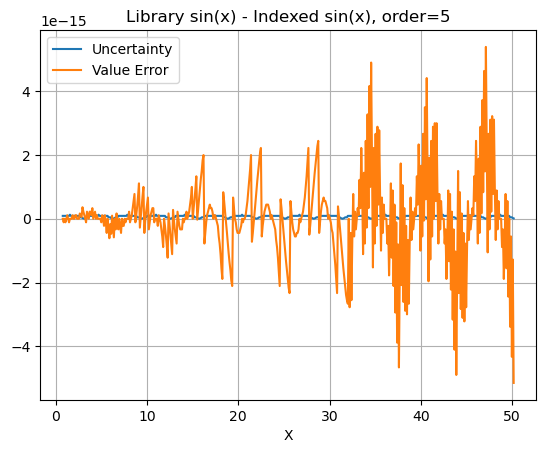

In [117]:
df[(df['Order']==5) & (df['X'] >= math.pi/4)].set_index('X')[['Uncertainty', 'Value Error']]\
    .plot(title='Library sin(x) - Indexed sin(x), order=5', grid=True)

<AxesSubplot:title={'center':'Library sin(x) - Indexed sin(x), order=6'}, xlabel='X'>

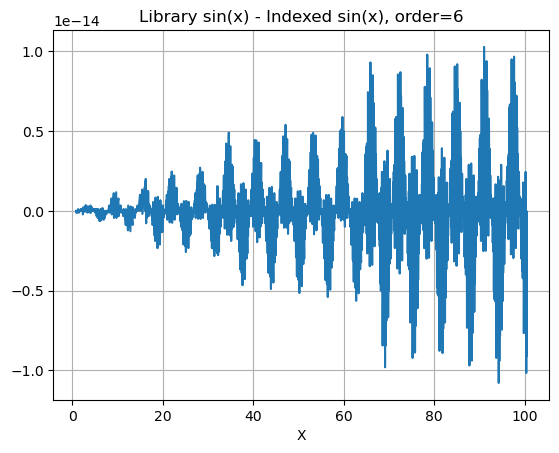

In [118]:
df[(df['Order']==6) & (df['X'] >= math.pi/4)].set_index('X')['Value Error']\
    .plot(title='Library sin(x) - Indexed sin(x), order=6', grid=True)

<AxesSubplot:title={'center':'Library sin(x) - Indexed sin(x), order=7'}, xlabel='X'>

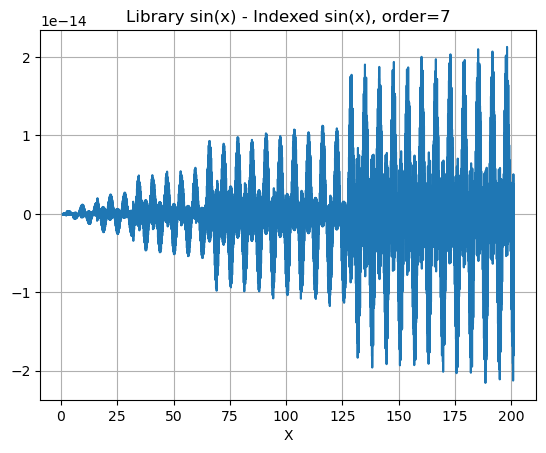

In [119]:
df[(df['Order']==7) & (df['X'] >= math.pi/4)].set_index('X')['Value Error']\
    .plot(title='Library sin(x) - Indexed sin(x), order=7', grid=True)

In [120]:
{order: df[(df['Order']==order) & (df['X'] > math.pi/4)]['Value Error'].std() for order in range(4, 8)}

{4: 6.368537156700066e-16,
 5: 1.2995110839443306e-15,
 6: 2.5396792822297165e-15,
 7: 5.073075564076473e-15}

In [121]:
{order: df[(df['Order']==order) & (df['X'] > math.pi/4)]['Normalized Error'].std() for order in range(4, 8)}

{4: 2708936291815931.0,
 5: 1947642880283875.0,
 6: 1404115464636928.8,
 7: 970378035824574.0}

In [122]:
{order: df[(df['Order']==order) & (df['X'] > math.pi/4)]['Absolute Error'].max() for order in range(4, 8)}

{4: 2.1094237467877974e-15,
 5: 5.3896838775215305e-15,
 6: 1.077936775504306e-14,
 7: 2.155873551008612e-14}

# Sin Error

In [7]:
def PlotSinError(order):
    freq = 1 << (order - 2)
    size = 1 << order
    sWave = np.array([0 if (i % 2)==0 else 1 if (i % 4)==1 else -1 for i in range(size)])
    sSin = np.array([math.sin(i *2*math.pi *freq/size) for i in range(size)])
    sDiff = sSin - sWave
    
    fig, ax = plt.subplots()
    ax.set_title('Error of sin(j 2$\pi$ $2^4/2^6$)')    
    ax.grid(True)
    ax.set_xlabel('index time j')
    ax.plot(range(size), sDiff, label='Sin Error')


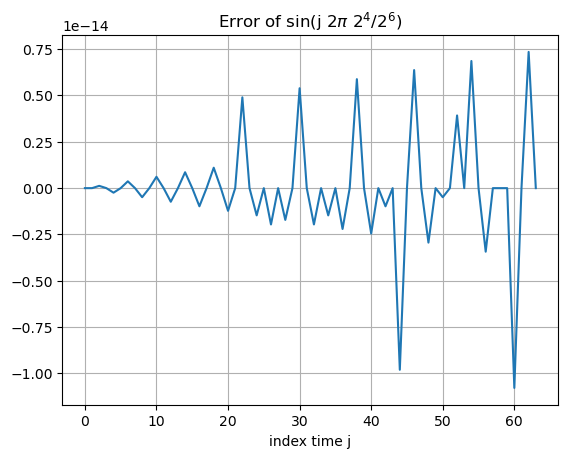

In [8]:
PlotSinError(6)